In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Catch radius & Team reward

In [13]:
dfs = []
for filename in os.listdir("./"):
    if filename.startswith("catch_radius"):
        df = pd.read_csv(filename)
        df["radius"] = int(filename.split("_")[2])
        df["team_reward"] = int(filename.split("_")[5].replace(".csv", ""))
        dfs.append(df)
df = pd.concat(dfs)

In [23]:
result = df.groupby(['team_reward', 'radius'], as_index=False)['lone_wolf_rate'].last().pivot(index='radius', columns='team_reward', values='lone_wolf_rate')

<Axes: xlabel='team_reward', ylabel='radius'>

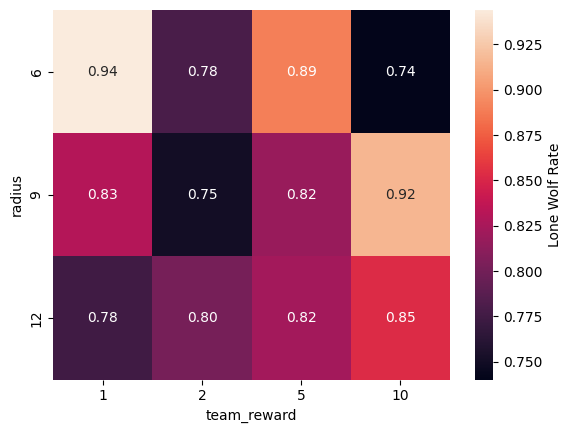

In [26]:
sns.heatmap(result, annot=True, fmt=".2f", cbar_kws={'label': 'Lone Wolf Rate'})

# Hyperparameters

In [2]:
df_batch_size_512 = pd.read_csv("batch_size_512.csv")
df_batch_size_1024 = pd.read_csv("batch_size_1024.csv")
df_batch_size_2048 = pd.read_csv("batch_size_2048.csv")

df_batch_size_512["batch_size"] = 512
df_batch_size_1024["batch_size"] = 1024
df_batch_size_2048["batch_size"] = 2048

df_batch_size = pd.concat([df_batch_size_512, df_batch_size_1024, df_batch_size_2048], ignore_index=True)

In [3]:
df_hidden_units_64 = pd.read_csv("hidden_units_64.csv")
df_hidden_units_128 = pd.read_csv("hidden_units_128.csv")
df_hidden_units_256 = pd.read_csv("hidden_units_256.csv")

df_hidden_units_64["hidden_units"] = 64
df_hidden_units_128["hidden_units"] = 128
df_hidden_units_256["hidden_units"] = 256

df_hidden_units = pd.concat([df_hidden_units_64, df_hidden_units_128, df_hidden_units_256], ignore_index=True)

In [4]:
df_gamma_0950 = pd.read_csv("gamma_0950.csv")
df_gamma_0990 = pd.read_csv("gamma_0990.csv")
df_gamma_0995 = pd.read_csv("gamma_0995.csv")

df_gamma_0950["gamma"] = 0.950
df_gamma_0990["gamma"] = 0.990
df_gamma_0995["gamma"] = 0.995

df_gamma = pd.concat([df_gamma_0950, df_gamma_0990, df_gamma_0995], ignore_index=True)

<Axes: xlabel='batch_size'>

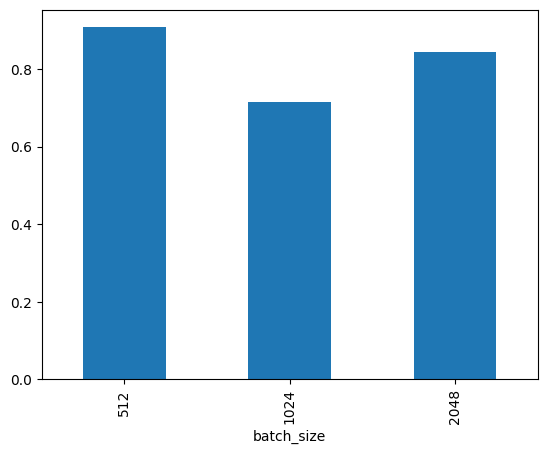

In [5]:
df_batch_size.groupby("batch_size")["lone_wolf_rate"].last().plot(kind='bar')

In [ ]:
df_hidden_units.groupby("hidden_units=")

,episode,capture,lone_wolf_rate,prey_survived_step,average_predator_distance,predator_proximity_rate,hidden_units
0,0,False,1.000000,120,28.927190,0.000000,64
1,1,False,0.500000,4866,9.681664,0.616523,64
2,2,False,0.666667,127,25.894990,0.000000,64
3,3,False,0.750000,2126,15.576780,0.000000,64
4,4,False,0.600000,3032,6.172439,0.657322,64
...,...,...,...,...,...,...,...
745,245,True,0.767347,649,15.689750,0.000000,256
746,246,True,0.764228,5124,4.551648,0.851483,256
747,247,True,0.765182,837,2.882930,0.940263,256
748,248,True,0.766129,2489,4.901454,0.770992,256


# 